In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def Numerical_Solns(n,L):
    
    N = 1000                                                                #Of points to test
    norm = np.sqrt(2/L)                                                     '''Normalization from analytical solution'''
    dx = n*np.pi/N                                                          #delta x
    x = [0]                                                                 #Initial conditions
    ps = [0]                                                                #^
    ps1 = [norm]                                                            #^
    ps2 = [0]                                                               #^
    
    for i in range(0,N):                                                    #[LÖÖP]
        p2 = ps2[-1] - ps1[-1]*dx                                           #Determining next 2nd Derivative value
        p1 = ps1[-1] + p2*dx                                                #Determining next 1st Derivative value
        p =  ps[-1]  + p1*dx                                                #Determining next Psi value
        px = x[-1] + L/N                                                    #Determining next X value
        ps.append(p)                                                        #Adding values to lists
        ps1.append(p1)                                                      #^
        ps2.append(p2)                                                      #^
        x.append(px)                                                        #^

    xa = np.array(x)                                                        #Converting lists to Numpy arrays
    psi = np.array(ps)                                                      #^
    psi1 = np.array(ps1)                                                    #^
    psi1 = psi1*n*np.pi/L          '''Multiplying by n*pi/L derived from analytical solution'''
    psi2 = np.array(ps2)                                                    #^
    psi2 = psi2*((n*np.pi/L)**2)   '''Multiplying by (n*pi/L)^2 derived from analytical solution'''
    analytical = norm*np.sin(n*np.pi*xa/L)                                  #Analytical Soln

    return xa, psi, psi1, psi2, analytical

In [5]:
def Plot_Solns(n,L):
    N = 1000                                                                #Of points to test
    x, psi, psi1, psi2, analytical = Numerical_Solns(n,L)
    print("Box length =",L,"m")
    
    plt.figure(0)                                                           #Plotting Wavefunction against its derivatives
    plt.plot(x,psi,'r',label=psi)
    plt.plot(x,psi1,'g',label=psi1,alpha=0.5)
    plt.plot(x,psi2,'b',label=psi2,alpha=0.5)
    plt.legend(["Wavefunction","1st Derviative","Second Derivative"],loc=4)
    plt.title("Wavefunction with its Derivatives")
    plt.xlim(0,L)
    plt.xlabel("Position in Box (m)")
    plt.yticks([0])
    
    PDF = psi**2
    
    plt.figure(1)                                                           #Plotting Wavefunction against its PDF
    plt.plot(x,psi)
    plt.plot(x,PDF)
    plt.xlim(0,L)
    plt.legend(["Wavefunction","PDF"],loc=4)
    plt.title("Wavefunction with its PDF")
    plt.xlabel("Position in Box (m)")
    plt.yticks([0])
    
    Error = np.abs(analytical - psi)
    
    plt.figure(2)                                                           #Plotting numerical's error against analytical
    plt.plot(x,Error,'r')
    plt.title("Error Against Analytical Solution")
    plt.xlim(0,L)
    plt.xlabel("Position in Box (m)")
    plt.ylabel("Error (a.u.)")
    plt.ylim(0)

In [6]:
h = 6.62607004e-34  #Planck Constant                                        #Constants
E = ((h**2)*(6.24e18))/8  #h^2*(conversion from J to eV)/8

def Analytical_energy(n,m,L):
    return ((n/L)**2*E)/m  #Returns energies in eV

def Energies(n,L,m):
    
    N = 1000                                                                #Of points to test
    # n = Principal Quantum Number
    # L = Length of Box in meters
    # m = Mass of Particle in kg
    
    hbar = 1.0546e-34 #J/s                                                  #Constants
    k = hbar**2*6.242e18/(2*m)
    
    Energy = []                                                             #Empty Lists
    ns = []
    Error = []
    
    print("Particle mass =",m,"kg")
    print("Box length =",L,"m")
    
    for i in range(0,n):
        _, psi, _, psi2, _ = Numerical_Solns(i+1,L)
        
        E = (sum(abs(psi2))/sum(abs(psi)))/len(psi)
        E = E*k*N
        Energy.append(E)
        ns.append(i+1)
        AE = Analytical_energy(i+1,m,L)
        Err = np.abs((E-AE)/AE)*100
        Error.append(Err)
    
    plt.figure(0)                                                           #Plotting energies
    plt.plot(ns,Energy)
    plt.title("Energies in a 1D Infinite Square Well")
    plt.xlabel("Energy Level")
    plt.ylabel("Energy (eV)")
    plt.xticks(np.arange(1, n+1, step=1))
    plt.ylim(0)
    
    plt.figure(1)                                                           #Plotting errors
    plt.plot(ns,Error,'r')
    plt.title("Errors Against Analytical Energies")
    plt.xlabel("Energy Level")
    plt.ylabel("Error (%)")
    plt.xticks(np.arange(1, n+1, step=1))
    plt.ylim(0)

$$ -\frac{ \hbar ^2 }{2m}  \frac{\partial^2 \psi(x)  }{\partial x^2} = E \psi (x)$$

Box length = 1 m


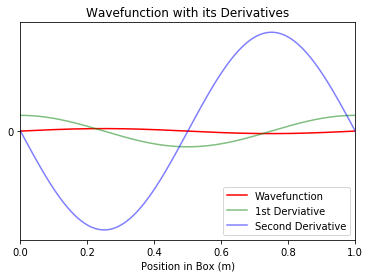

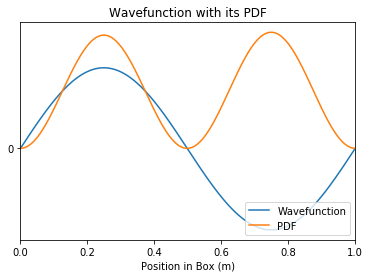

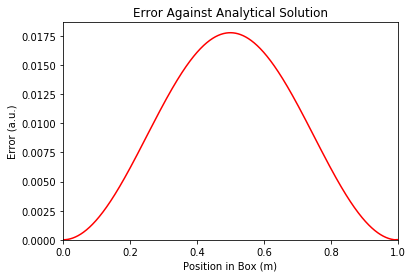

In [7]:
Plot_Solns(2,1)

$$ E = -\frac{ \hbar ^2 }{2m}  \frac{\partial^2 \psi(x)  }{\partial x^2} / \psi (x)$$

Electron in a 1 nm box
Particle mass = 9.11e-31 kg
Box length = 1e-09 m


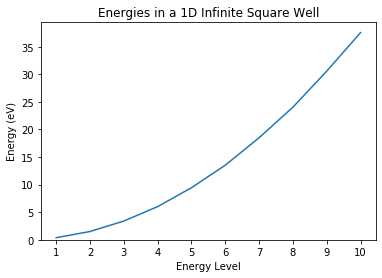

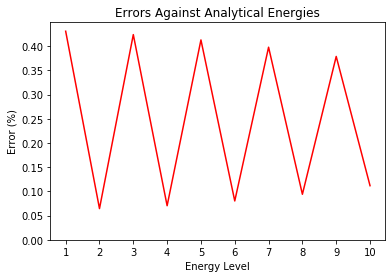

In [10]:
print("Electron in a 1 nm box")
Energies(10,1e-9,9.11e-31)